In [2]:
 # Initialisations
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8) # (w, h)
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


## K-Means

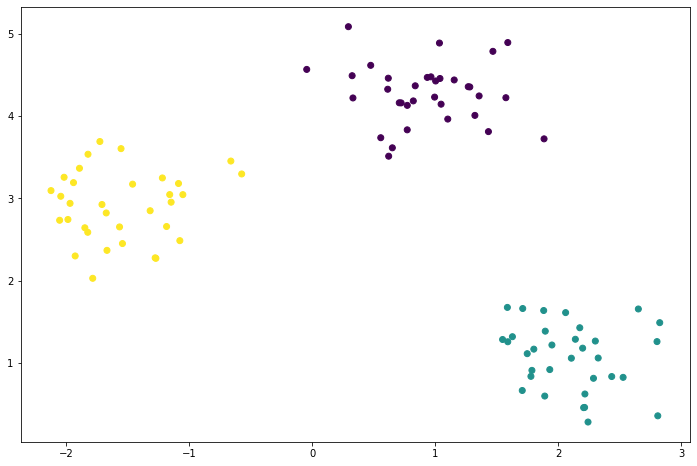

In [3]:
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1],c=y)

### modele k-means

In [4]:
model = KMeans(n_clusters=3) # model avec 3 clusters

In [5]:
model.fit(X)


KMeans(n_clusters=3)

In [6]:
model.predict(X)


array([0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0,
       1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2])

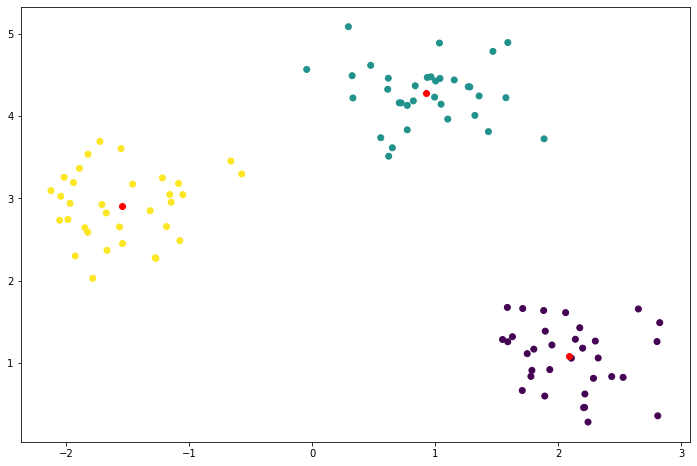

In [7]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')

In [8]:
model.score(X)

-30.870531280140664

### calcul de l'inertia

In [9]:
model.inertia_  # represente la somme des distance entre les points du cluster et le centroîde

30.87053128014066

### ELbow method

Comme il est difficile de prevoir le nombre de clusters, il faut donc utiliser elbow pour tracer l'evolution du coût de notre méthode  
en fonction du nombre de cluster et de detecter dans le grapghique une zone de coude ( zone qui represente l'intervale du nombre de cluster)  
optimal pour notre modèle

In [10]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Cout du modele (Inertia)')

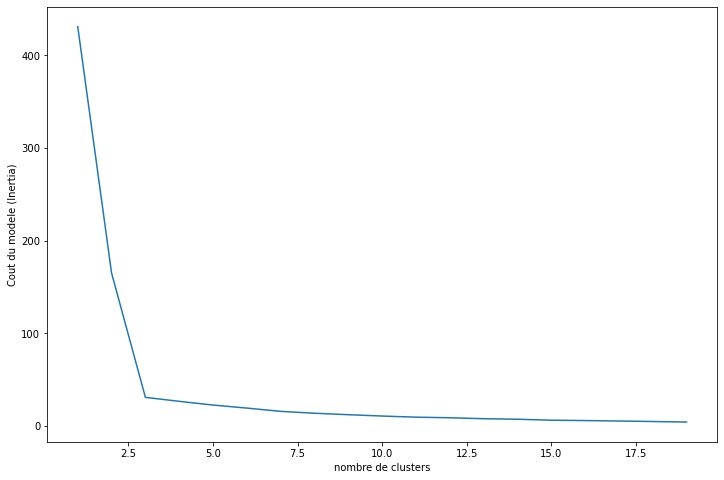

In [11]:
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

zone de coude à trois 3

## Exercice 2

### Génération du jeu de données

In [12]:
from sklearn.ensemble import IsolationForest

### Génération du jeu de données

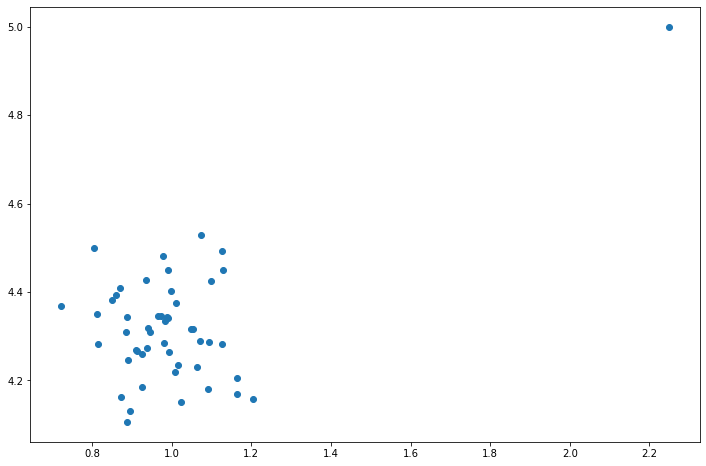

In [13]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

nous avons un point très eloigné des autres , il est l'intru

### Isolation forest

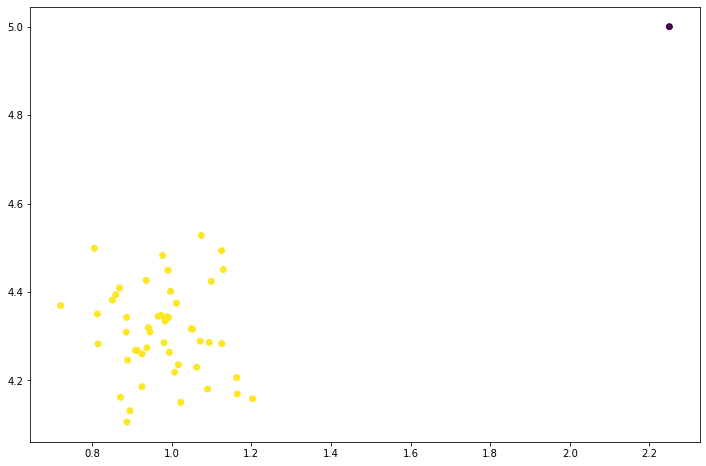

In [14]:
model = IsolationForest(contamination=0.01) #  contamination = pourcentage d'information bisare
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

Nous avons bien une isolation de notre anomalie

### modification des l'hyperparamètre

## Exercice 3 : Detection des chiffres manuscrits mal écrit 

### importation 

In [15]:
from sklearn.datasets import load_digits

Téléchargez le jeu de données correspondant

In [16]:
digits = load_digits()
images = digits.images


### Récuperez les images et les targets comme suit

In [17]:
X = digits.data
y = digits.target

### En vous appuyant sur Shape

In [18]:
print("Taille de X : ", X.shape)
print("Taille de chaque image : ",images.shape)

Taille de X :  (1797, 64)
Taille de chaque image :  (1797, 8, 8)


Nous avons 1797 images sur 64 pixel,

### Visualisation de quelques images

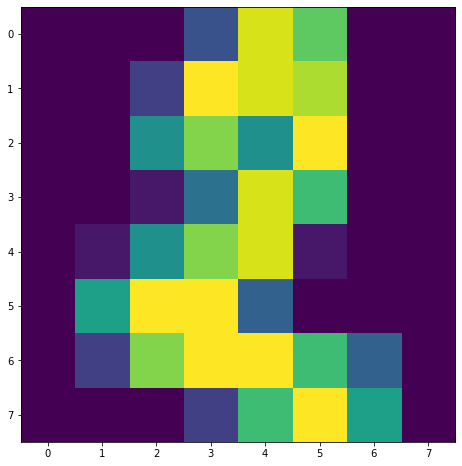

In [19]:
plt.imshow(images[2])

l'objectif est donc d'isoler les images mal ecrites

### selection

In [20]:
model = IsolationForest(random_state=0, contamination=0.02)


### Entrainement

In [21]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

### Evaluation

In [22]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

### Filtrer

In [23]:
outliers = model.predict(X) == -1 
print(outliers)

[False False False ... False False False]


les "True" nous donnes ou nous avons les anolmalies 

Text(0.5, 1.0, '2')

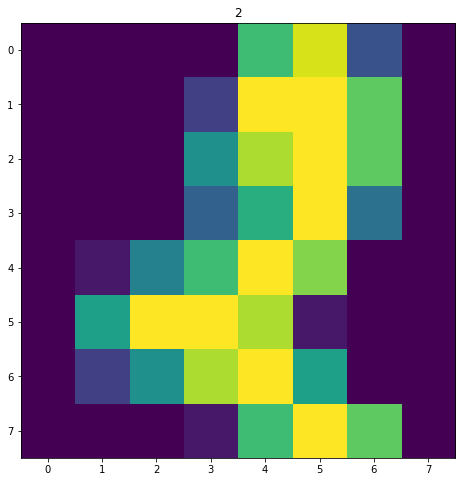

In [24]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

nous avons donc une bonne detection d'anamalie

### selectionnner 

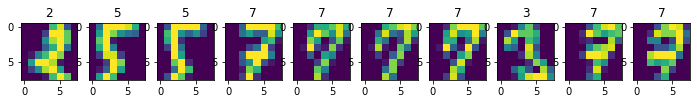

In [25]:
plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

### modifiez 

### Exercice 4 : Réduction de la dimensionnalité   
PCA : Reduction de dimension

### Téléchargement du jeu de données 

#### Importation de la librairie

In [26]:
from sklearn.decomposition import PCA


#### Télécharger le jeu de données

In [27]:
digits = load_digits()
images = digits.images

#### Récupérez les images 

In [28]:
X = digits.data
y = digits.target

#### Donnez les dimensions de ce jeu de données

### Visualisation des données

#### Chargez

In [29]:
from sklearn.decomposition import PCA

#### Selectionnez le modèle PCA

In [30]:
model = PCA(n_components=2)

nous allons donc passer de 64 à 2 dimension

#### Entrainez le modèle

In [31]:
X_reduced=model.fit_transform(X)

In [32]:
print("Dimension : ",X_reduced.shape)

Dimension :  (1797, 2)


nous avons bien deux dimension

#### Verifiez la dimension du tableau 

#### Observer

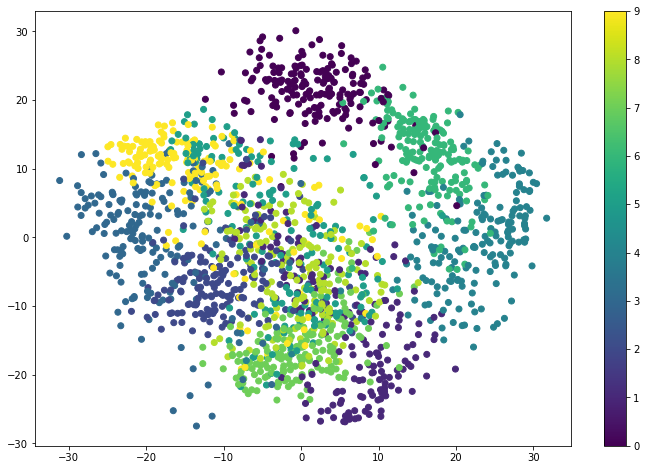

In [33]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()

In [34]:
X_reduced.shape

(1797, 2)

#### Interpretez 

#### Quelle est la signification des axes

#### Analyser le contenu de chaque composantes

In [36]:
model.components_.shape

(2, 64)

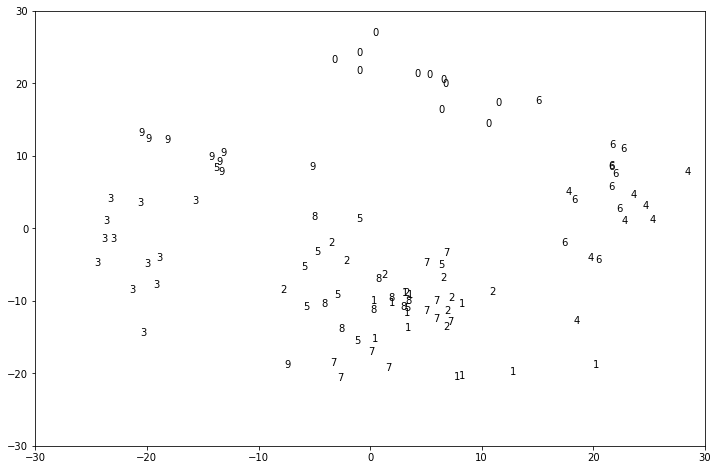

In [48]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(X_reduced[i,0], X_reduced[i,1], str(y[i]))

# Compression de données

## modele

In [37]:
n_dimension = X.shape[1]
model = PCA(n_components=n_dimension)

## Entrainez le model

In [38]:
X_reduced = model.fit_transform(X)

## Examinez le pourcentage de variance

In [39]:
var = model.explained_variance_ratio_ # variance
print(np.cumsum(var))

[0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677 0.76195018 0.78467714
 0.80289578 0.82063433 0.83530534 0.84940249 0.86258838 0.87506976
 0.88524694 0.89430312 0.9031985  0.91116973 0.91884467 0.9260737
 0.93303259 0.9389934  0.94474955 0.94990113 0.95479652 0.9590854
 0.96282146 0.96635421 0.96972105 0.97300135 0.97608455 0.97902234
 0.98158823 0.98386565 0.98608843 0.98820273 0.99010182 0.99168835
 0.99319995 0.99460574 0.99577196 0.99684689 0.99781094 0.99858557
 0.99914278 0.99954711 0.99975703 0.99983951 0.99989203 0.99994255
 0.99997555 0.99998798 0.99999503 0.99999804 0.99999911 0.99999966
 1.         1.         1.         1.        ]


## Tracez le pourcentage

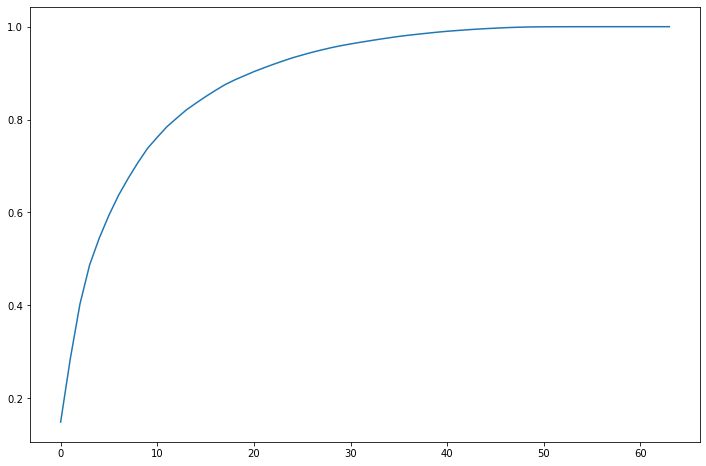

In [40]:
plt.plot(np.cumsum(var))

## En vous appuyant sur le graphique

## Trouvez à partir de combien de parametre

In [41]:
m_dim = np.argmax(np.cumsum(var) > 0.90)
print("meilleur dim : ",np.argmax(np.cumsum(var) > 0.90))

meilleur dim :  20


## Prenez le nombre de compo

In [42]:
model = PCA(n_components=m_dim)

In [43]:
X_reduced = model.fit_transform(X)

## Décompressez les images en vous appuyant sur

In [44]:
X_recovered = model.inverse_transform(X_reduced)

## Affichez une des images de X_recoverde

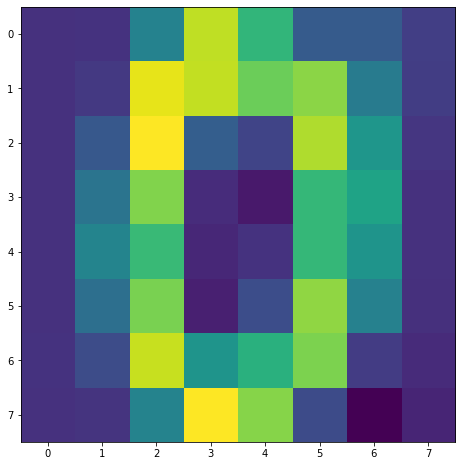

In [45]:
plt.imshow(X_recovered[0].reshape((8,8)))

## il est possible de fixer le variance à préserver comme suit

In [46]:
model = PCA(n_components=0.40)

In [47]:
model.n

AttributeError: 'PCA' object has no attribute 'n'

In [ ]:
print("Le nombre de composantes utilisées : ",model.n_components_)

AttributeError: 'PCA' object has no attribute 'n_components_'

## Analyser l'impact de la reduction du nombre de composant

In [ ]:


plt.bar(range(n_dimension), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')